<a href="https://colab.research.google.com/github/Jawakar-7/CarDheko-Price-Prediction/blob/main/Stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stable Diffusion :
Stable Diffusion is a text-to-image latent diffusion model created by the researchers and engineers from CompVis, Stability AI and LAION. It's trained on 512x512 images from a subset of the LAION-5B database. This model uses a frozen CLIP ViT-L/14 text encoder to condition the model on text prompts. With its 860M UNet and 123M text encoder, the model is relatively lightweight and can run on many consumer GPUs.
Here the first Model I'm trying to use is a  
###'CompVis/stable-diffusion-v1-4" model


In [1]:
!nvidia-smi
#to check if the model is connected with a GPU runtime


Mon Aug 21 13:08:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install diffusers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.0 MB/s eta 0:00:00


In [3]:
!pip install transformers scipy ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.5 MB/s eta 0:00:00


### Pipeline
StableDiffusionPipeline is an end-to-end inference pipeline that you can use to generate images from text with just a few lines of code.

First, we load the pre-trained weights of all components of the model

In [4]:
import torch
from diffusers import StableDiffusionPipeline

In [5]:
mypipe=StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4",torch_dtype=torch.float16)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [6]:
mypipe=mypipe.to("cuda")

Now that we have  moved our model to GPU we will try and create images using Stable Diffusion API

In [7]:
prompt="Batman VS superman  "

In [8]:
img1=mypipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

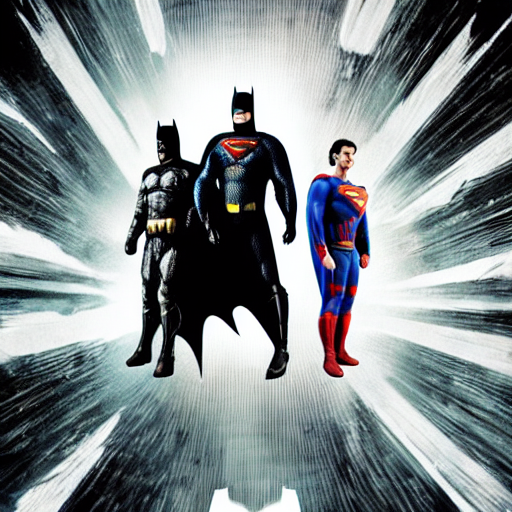

In [9]:
img1

Running the above cell multiple times will give you a different image every time. If you want deterministic output you can pass a random seed to the pipeline. Every time you use the same seed you'll have the same image result.
and also we  can change the number of inference steps using the num_inference_steps argument. In general, results are better the more steps you use. Stable Diffusion, being one of the latest models, works great with a relatively small number of steps, so we recommend to use the default of 50.

### Since we are trying to use a Stable diffusion model for creating comic images, it is better if we have the same seed , but we will not know for sure so im creating two functions to check the relavency

  0%|          | 0/15 [00:00<?, ?it/s]

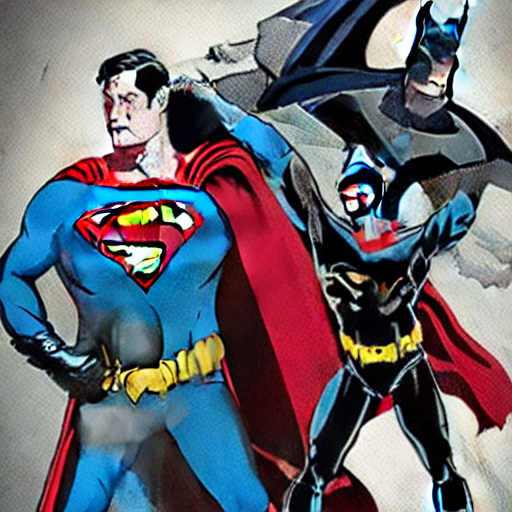

In [10]:
import torch

generator = torch.Generator("cuda").manual_seed(1024)

image = mypipe(prompt, num_inference_steps=15, generator=generator).images[0]

image

  0%|          | 0/95 [00:00<?, ?it/s]

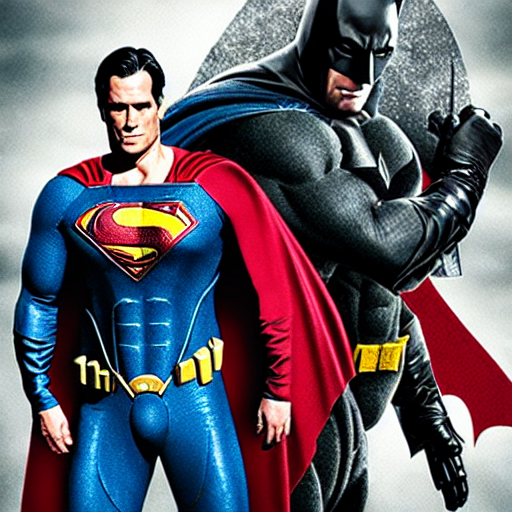

In [11]:
import torch

generator = torch.Generator("cuda").manual_seed(1024)

image = mypipe(prompt, num_inference_steps=95, generator=generator).images[0]

image

Here we can see that the quality of images gets increased for each number of inference steps and since we have set a seed value the same image will be reapeated no matter how many time we run the same prompt .

#####The other parameter in the pipeline call is the image size , defaultly it will be creating square images , but we can manually specify the size of images
Make sure height and width are both multiples of 8.
Going below 512 might result in lower quality images.

In [13]:
h=1024
w=1024
image2=mypipe(prompt,h,w).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7A49463FCCA0>


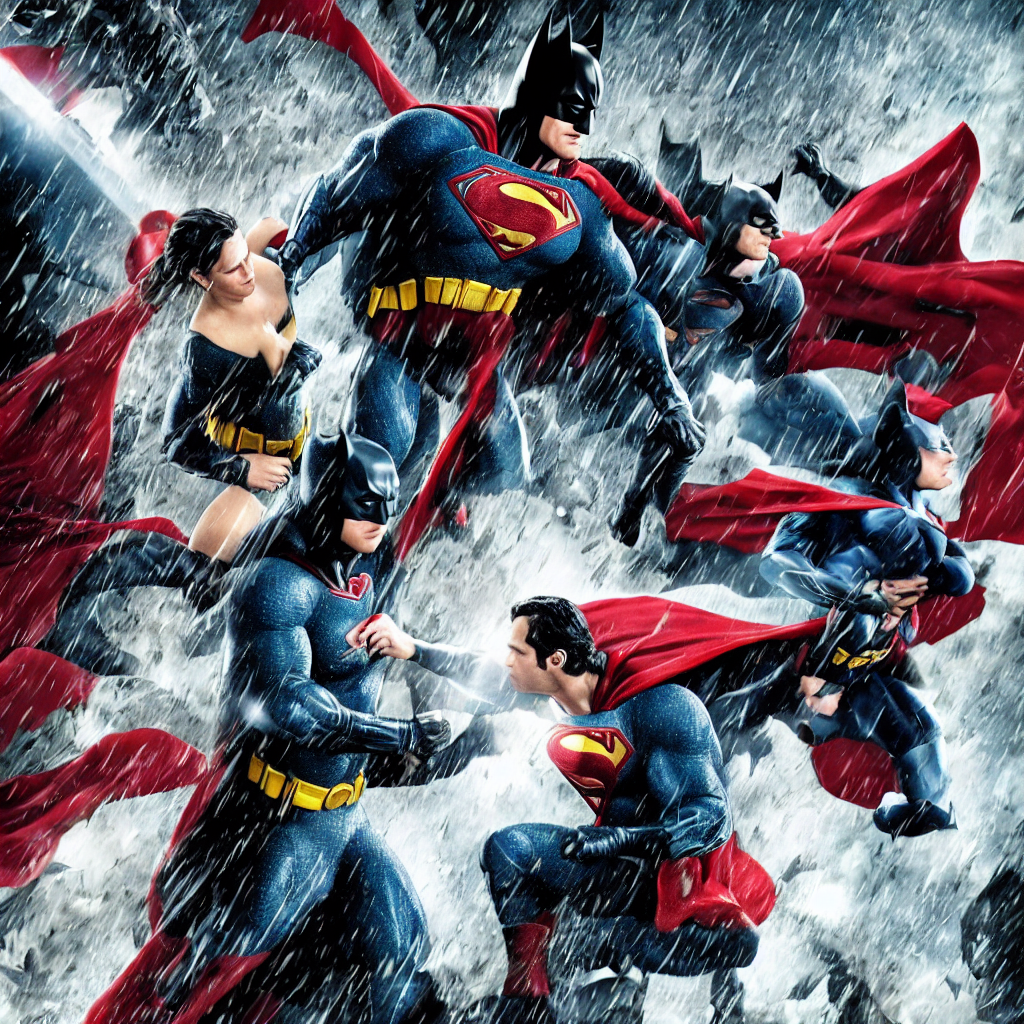

In [16]:
image2

## Now that we have seen all the basics , i will try and create a function for our work


In [ ]:
#to create a grid of images
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [ ]:
import cv2

In [ ]:
def comic_creation(prompt,seed=generator,h,w,noof_ininference):
  c_img=mypipe(prompt=prompt,seed=seed,height=h,width=2,num_inference_steps=noof_ininference)
  path=pr
  c_.save()




